In [3]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
orig_data = pd.read_csv('311_calls_2months.csv',
                        nrows=100000,
                        dtype=unicode,
                        parse_dates=['Created Date'])

In [5]:
print orig_data.columns.values

['Unique Key' 'Created Date' 'Closed Date' 'Agency' 'Agency Name'
 'Complaint Type' 'Descriptor' 'Location Type' 'Incident Zip'
 'Incident Address' 'Street Name' 'Cross Street 1' 'Cross Street 2'
 'Intersection Street 1' 'Intersection Street 2' 'Address Type' 'City'
 'Landmark' 'Facility Type' 'Status' 'Due Date'
 'Resolution Action Updated Date' 'Community Board' 'Borough'
 'X Coordinate (State Plane)' 'Y Coordinate (State Plane)'
 'Park Facility Name' 'Park Borough' 'School Name' 'School Number'
 'School Region' 'School Code' 'School Phone Number' 'School Address'
 'School City' 'School State' 'School Zip' 'School Not Found'
 'School or Citywide Complaint' 'Vehicle Type' 'Taxi Company Borough'
 'Taxi Pick Up Location' 'Bridge Highway Name' 'Bridge Highway Direction'
 'Road Ramp' 'Bridge Highway Segment' 'Garage Lot Name' 'Ferry Direction'
 'Ferry Terminal Name' 'Latitude' 'Longitude' 'Location']


In [6]:
# Gives the first element of the data frame as a series.
orig_data.iloc[0]

# Unspecified does not mean NaN

Unique Key                                      29641524
Created Date                         2015-01-06 02:14:39
Closed Date                                          NaN
Agency                                             CHALL
Agency Name                                        CHALL
Complaint Type                     Opinion for the Mayor
Descriptor                                  PUBLICSAFETY
Location Type                                        NaN
Incident Zip                                         NaN
Incident Address                                     NaN
Street Name                                          NaN
Cross Street 1                                       NaN
Cross Street 2                                       NaN
Intersection Street 1                                NaN
Intersection Street 2                                NaN
Address Type                                         NaN
City                                                 NaN
Landmark                       

In [7]:
# Coimplaint type:
orig_data['Complaint Type']

0          Opinion for the Mayor
1             Noise - Commercial
2                   Animal Abuse
3          Street Sign - Missing
4        Noise - Street/Sidewalk
5                Illegal Parking
6          Opinion for the Mayor
7          Street Sign - Missing
8             Consumer Complaint
9          Opinion for the Mayor
10              Blocked Driveway
11         Street Sign - Missing
12              Blocked Driveway
13            Food Establishment
14              Street Condition
15              Street Condition
16         Street Sign - Missing
17         Street Sign - Missing
18            Consumer Complaint
19         Street Sign - Missing
20            Noise - Commercial
21                      Graffiti
22         Opinion for the Mayor
23                        Rodent
24            Noise - Helicopter
25                  Animal Abuse
26         Opinion for the Mayor
27            Noise - Commercial
28                  Animal Abuse
29              Street Condition
          

In [14]:
# Counts the frequencies of the values - Very helpful and important!!! - Remember

orig_data['Complaint Type'].value_counts()

HEAT/HOT WATER                          20286
Blocked Driveway                         5760
Street Light Condition                   5288
Street Condition                         4495
Illegal Parking                          4045
UNSANITARY CONDITION                     3855
PAINT/PLASTER                            3384
PLUMBING                                 2846
Noise - Commercial                       2542
Opinion for the Mayor                    2373
Water System                             2316
Noise                                    2184
Traffic Signal Condition                 2067
DOOR/WINDOW                              2019
WATER LEAK                               2014
Sewer                                    1769
Dirty Conditions                         1537
Broken Muni Meter                        1471
ELECTRIC                                 1439
Sanitation Condition                     1276
DOF Literature Request                   1222
FLOORING/STAIRS                   

In [8]:
# Look at top 10 ffrequent results
orig_data['Complaint Type'].value_counts()[:10]

HEAT/HOT WATER            20286
Blocked Driveway           5760
Street Light Condition     5288
Street Condition           4495
Illegal Parking            4045
UNSANITARY CONDITION       3855
PAINT/PLASTER              3384
PLUMBING                   2846
Noise - Commercial         2542
Opinion for the Mayor      2373
Name: Complaint Type, dtype: int64

In [16]:
# Most infrequrnt complaints
orig_data['Complaint Type'].value_counts()[-10:]

Standpipe - Mechanical               1
Window Guard                         1
Transportation Provider Complaint    1
Illegal Fireworks                    1
DHS Income Savings Requirement       1
Rangehood                            1
Ferry Permit                         1
Squeegee                             1
Tanning                              1
Invitation                           1
Name: Complaint Type, dtype: int64

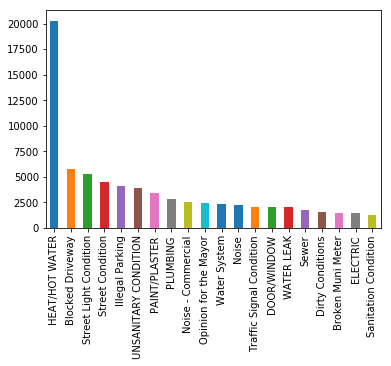

In [9]:
# Easier to plot the numbers and visualization:
vc = orig_data['Complaint Type'].value_counts()
top_20 = orig_data['Complaint Type'].value_counts()[:20]
top_20.plot(kind='bar')

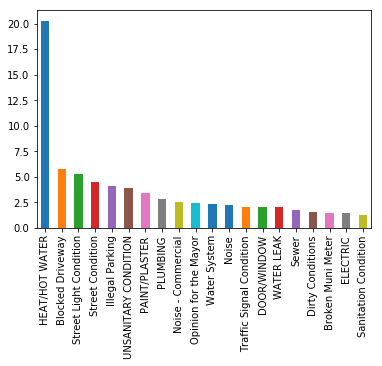

In [22]:
# For y axis to show the percentage of complaints - 
s = vc*100/vc.sum()
s[:20].plot(kind= 'bar')

In [11]:
w, h = 3, 3;
Matrix = [[0 for x in range(w)] for y in range(h)] 

In [24]:
Matrix

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [12]:
import itertools
list(itertools.permutations([1, 2, 3]))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [13]:
orig_data['Incident Zip'][:5]

0      NaN
1    11372
2    11416
3    11233
4    10022
Name: Incident Zip, dtype: object

#Find the Borough for each zip code

In [42]:
# Many diff zip codes to one borough: 

#Its possible that different zip codes are mapped to mltipl boroughs
# Each zip code should show up uniquely in the series (As if it was a dictionary). 

mask = (orig_data['Borough'] == 'Unspecified')
orig_data.loc[mask, 'Borough'] = np.nan # This sets the value to NaN

borough_zip = orig_data[['Borough', 'Incident Zip']]

mask_borough = borough_zip['Borough'].notnull()
#print mask_borough
mask_zip = borough_zip['Incident Zip'].notnull() 

mask = (mask_borough & mask_zip) # Both series, combine through & and take only where both are true
borough_zip_clean = borough_zip[mask]
borough_zip_clean[:5]



,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


In [44]:
# Another option is dropna and say how = 'any'. It will drop all the rows where it finds any! 

borough_zip_clean = borough_zip.dropna(how='any')
borough_zip_clean[:5]


,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


In [52]:
# Now we have duplicate entries. So we will use - dropduplicates. 

borough_zip_clean.drop_duplicates() # If any row exactly identical then it will drop (i.e. matching all the fields)

borough_zip_dedeup = borough_zip_clean.drop_duplicates(subset="Incident Zip") # This will drop duplicates even if there are duplicates in the zip code column
#len(borough_zip_dedeup)


196

In [63]:
tmp_df = borough_zip_dedeup.set_index('Incident Zip') # Setting zip code to index! 
borough_zip_sereis = tmp_df['Borough'] # To get the seies just call the column. 

In [77]:
zip_crime_counts =  orig_data['Incident Zip'].value_counts()
# Returns the number of incidents by zip codes.
# Plot # of complaints by zip code, but map zip codes to borough!

In [78]:
# Replace - by a rename function! 

rename_compaints = zip_crime_counts.rename(borough_zip_sereis)


BROOKLYN      1758
BRONX         1632
BRONX         1554
BRONX         1373
BRONX         1372
MANHATTAN     1309
BRONX         1251
BRONX         1245
BROOKLYN      1196
BRONX         1114
BROOKLYN      1088
BROOKLYN      1066
BROOKLYN      1051
BRONX         1035
BROOKLYN      1027
MANHATTAN     1021
BROOKLYN       983
BROOKLYN       979
MANHATTAN      960
BROOKLYN       955
BRONX          939
QUEENS         937
BROOKLYN       934
BROOKLYN       927
BROOKLYN       905
MANHATTAN      892
BROOKLYN       861
BROOKLYN       850
MANHATTAN      845
QUEENS         834
              ... 
11771            1
80155            1
35210-6928       1
20188            1
11552            1
000000           1
20123            1
55426-1066       1
MANHATTAN        1
MANHATTAN        1
07093            1
08854            1
11371            1
32824            1
11590            1
11024            1
11581            1
MANHATTAN        1
44139            1
11030            1
37214            1
07041       

In [79]:
borough_counts = borough_zip_clean['Borough'].value_counts()

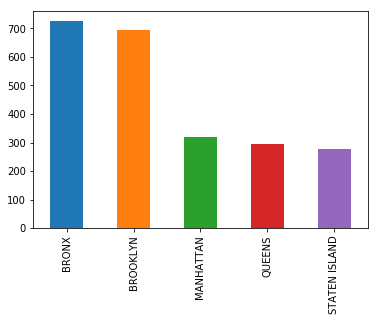

In [98]:
# No of complaints by size of borough - 
borough_counts = borough_zip_clean['Borough'].value_counts()
zip_per_borough = orig_data[['Borough', 'Incident Zip']].dropna(how='any') \
                                                        .drop_duplicates() \
                                                        ['Borough'] \
                                                        .value_counts()

borough_counts_per_zip = borough_counts / zip_per_borough
borough_counts_per_zip.plot(kind='bar')

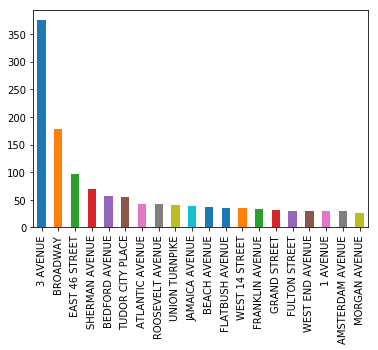

In [112]:


def is_noise(s):
    return ('Noise' in s)
# map is used for masking in series. 
mask = orig_data['Complaint Type'].map(is_noise)  # Get all types of complaints

noise_complaints = orig_data[mask]

# plot noisy street

noise_vc = noise_complaints['Street Name'].value_counts()
noise_vc[:20].plot(kind='bar')


In [117]:
# How many different boroughs show up. 

# n unique - The no of uniue items 

borough_avenue_cmpts = noise_complaints[noise_complaints['Street Name'] == '3 AVENUE']['Borough'].value_counts()

In [126]:
# 2 series - combines together - Just a series addition same index) => "+" will do concatenation. 
avenue = noise_complaints['Street Name']
borough = noise_complaints['Borough']

avenue + '(' + borough + ')'

1          ROOSEVELT AVENUE(QUEENS)
4         EAST 58 STREET(MANHATTAN)
20         ROOSEVELT AVENUE(QUEENS)
24         THAYER STREET(MANHATTAN)
27        WEST 16 STREET(MANHATTAN)
34        SHERMAN AVENUE(MANHATTAN)
37        WEST 16 STREET(MANHATTAN)
50        FLUSHING AVENUE(BROOKLYN)
51                              NaN
54        MERRICK BOULEVARD(QUEENS)
57         HUDSON STREET(MANHATTAN)
58         BEDFORD AVENUE(BROOKLYN)
60         BEDFORD AVENUE(BROOKLYN)
66        EAST 14 STREET(MANHATTAN)
67         HUDSON STREET(MANHATTAN)
68                              NaN
72         ROOSEVELT AVENUE(QUEENS)
74          MAUJER STREET(BROOKLYN)
77        WEST 35 STREET(MANHATTAN)
79        MCDONALD AVENUE(BROOKLYN)
138                             NaN
140       WEST 17 STREET(MANHATTAN)
145       ATLANTIC AVENUE(BROOKLYN)
154          MACON STREET(BROOKLYN)
155         LENOX AVENUE(MANHATTAN)
159                             NaN
161                             NaN
162          RUTLAND ROAD(BR